In [201]:
import numpy as np
import pandas as pd
import pickle
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot.cm
import matplotlib.image as mpimg
from scipy import ndimage

import os
import sys




In [94]:
os.chdir("src")
import model

data_a = pd.read_csv("../data/company/loan_subset_clean.csv")
data_b = pd.read_csv("../data/company/company_subset_clean.csv")
sim_data = pickle.load(open("../cache/company_subset_sim_p_base_0.01.pkl", 'rb'))
train_dataset = sim_data[0]
print(train_dataset.data1_idx.shape)
print(train_dataset.data2_idx.shape)
print(data_a.shape)
print(data_b.shape)

(54057,)
torch.Size([2702850, 1])
(77225, 92)
(220583, 157)


In [95]:
def get_batch(i):
    idx1 = train_dataset.data1_idx[i]
    idx2 = train_dataset.data2_idx[i * 50: (i + 1) * 50].detach().cpu().numpy().flatten()
    sim = train_dataset.data[i * 50: (i + 1) * 50, :train_dataset.sim_dim].detach().cpu().numpy().flatten()
    order = sim.argsort()
    name1 = data_a['Name'][idx1]
    names2 = data_b['name'][idx2].to_numpy()
    names2 = names2[order[::-1]]
    return name1, np.stack([names2, sim[order[::-1]]]).T
get_batch(0)

('tjf foods llc',
 array([['cai foods llc', 1.812034592613092],
        ['zee foods llc', 1.8086241680556983],
        ['erg foods llc', 1.8018033189409108],
        ['abby foods llc', 1.6415133647434037],
        ['cool foods llc', 1.634692515628616],
        ['asia foods llc', 1.6312820910712222],
        ['bcpfoods llc', 1.6312820910712222],
        ['paleo foods llc', 1.4675817123163213],
        ['lm foods', 1.3004709090040267],
        ['ga foods', 1.293650059889239],
        ['kp foods', 1.293650059889239],
        ['el sol foods llc', 1.293650059889239],
        ['hp foods', 1.293650059889239],
        ['mj foods', 1.293650059889239],
        ['acds llc', 1.293650059889239],
        ['hansen foods llc', 1.2902396353318455],
        ['bio foods ltd', 1.1401809548065196],
        ['b&g foods', 1.133360105691732],
        ['chefler foods llc', 1.133360105691732],
        ['victory foods llc', 1.133360105691732],
        ['bs foods bv', 1.1299496811343384],
        ['fooda', 1.1299

In [160]:
get_batch(10259)

('the village coffee shop',
 array([['village coffee shop', 2.149666623795075],
        ['one village coffee', 1.324343880905783],
        ['the village', 0.7991384990671426],
        ['the village chapel', 0.31485821191722746],
        ['sams coffee shop', 0.30462693824504616],
        ['the village church', 0.3012165136876524],
        ['be the village', 0.29439566457286487],
        ['the village voice', 0.1784412296214767],
        ['perks coffee shop', 0.14774740860493277],
        ['oasis coffee shop', 0.1238744367031764],
        ['comet coffee shop', 0.11364316303099509],
        ['village carts', -0.18988462257705035],
        ['big ben coffee shop', -0.20693674536401918],
        ['psvillage', -0.20693674536401918],
        ['the village network', -0.20693674536401918],
        ['spice village', -0.21375759447880674],
        ['tillage', -0.22398886815098804],
        ['village concepts', -0.3501745767745575],
        ['various coffee shops', -0.356995425889345],
        ['me

In [178]:
get_batch(16930)

('hcx haircolor express',
 array([['door express', 0.6217964220826667],
        ['decor express', 0.45809604332776577],
        ['sar express', 0.44786476965558447],
        ['iver express', 0.2909852400154711],
        ['sf express', 0.28075396634328975],
        ['s t express', 0.13069528581796394],
        ['esi express', 0.12046401214578263],
        ['les express', 0.11705358758838885],
        ['rek express', 0.11364316303099509],
        ['dfw express', 0.11364316303099509],
        ['pho express', 0.11364316303099509],
        ['fbi express', 0.11023273847360132],
        ['css express', 0.11023273847360132],
        ['hmf express', 0.11023273847360132],
        ['adl express', 0.10682231391620756],
        ['express 1', 0.10682231391620756],
        ['fox express', 0.10682231391620756],
        ['expreso', 0.10682231391620756],
        ['lga express', 0.10682231391620756],
        ['banner express', -0.026184243822149438],
        ['jett express', -0.04323636660911828],
      

In [161]:
data_a[data_a['Name'].str.contains('mail')]['Name']

753              san jose mailing, inc.
1016                mail boxes etc 3899
1095       ozark mailing services, inc.
1193                    quick mail plus
1854      professional mailing services
                      ...              
75927    hands on mailing & fulfillment
75959         money mailer of riverside
75982              pack 'n' mail center
76007          mailboxes & parcel depot
76560    aim mail centers at pelham com
Name: Name, Length: 111, dtype: object

/mnt/n1p1/home/zhaomin/project/FedSim/src
[[[0.980556 0.613039 0.234646 1.      ]
  [0.980556 0.613039 0.234646 1.      ]]

 [[0.980556 0.613039 0.234646 1.      ]
  [0.980556 0.613039 0.234646 1.      ]]

 [[0.980556 0.613039 0.234646 1.      ]
  [0.980556 0.613039 0.234646 1.      ]]

 [[0.979233 0.607532 0.238013 1.      ]
  [0.979233 0.607532 0.238013 1.      ]]

 [[0.947051 0.512699 0.299049 1.      ]
  [0.947051 0.512699 0.299049 1.      ]]

 [[0.944844 0.507658 0.302433 1.      ]
  [0.944844 0.507658 0.302433 1.      ]]

 [[0.942598 0.502639 0.305816 1.      ]
  [0.942598 0.502639 0.305816 1.      ]]

 [[0.93799  0.492667 0.312575 1.      ]
  [0.93799  0.492667 0.312575 1.      ]]

 [[0.920714 0.458417 0.336166 1.      ]
  [0.920714 0.458417 0.336166 1.      ]]

 [[0.920714 0.458417 0.336166 1.      ]
  [0.920714 0.458417 0.336166 1.      ]]

 [[0.920714 0.458417 0.336166 1.      ]
  [0.920714 0.458417 0.336166 1.      ]]

 [[0.918109 0.453603 0.339529 1.      ]
  [0.918109 0.45

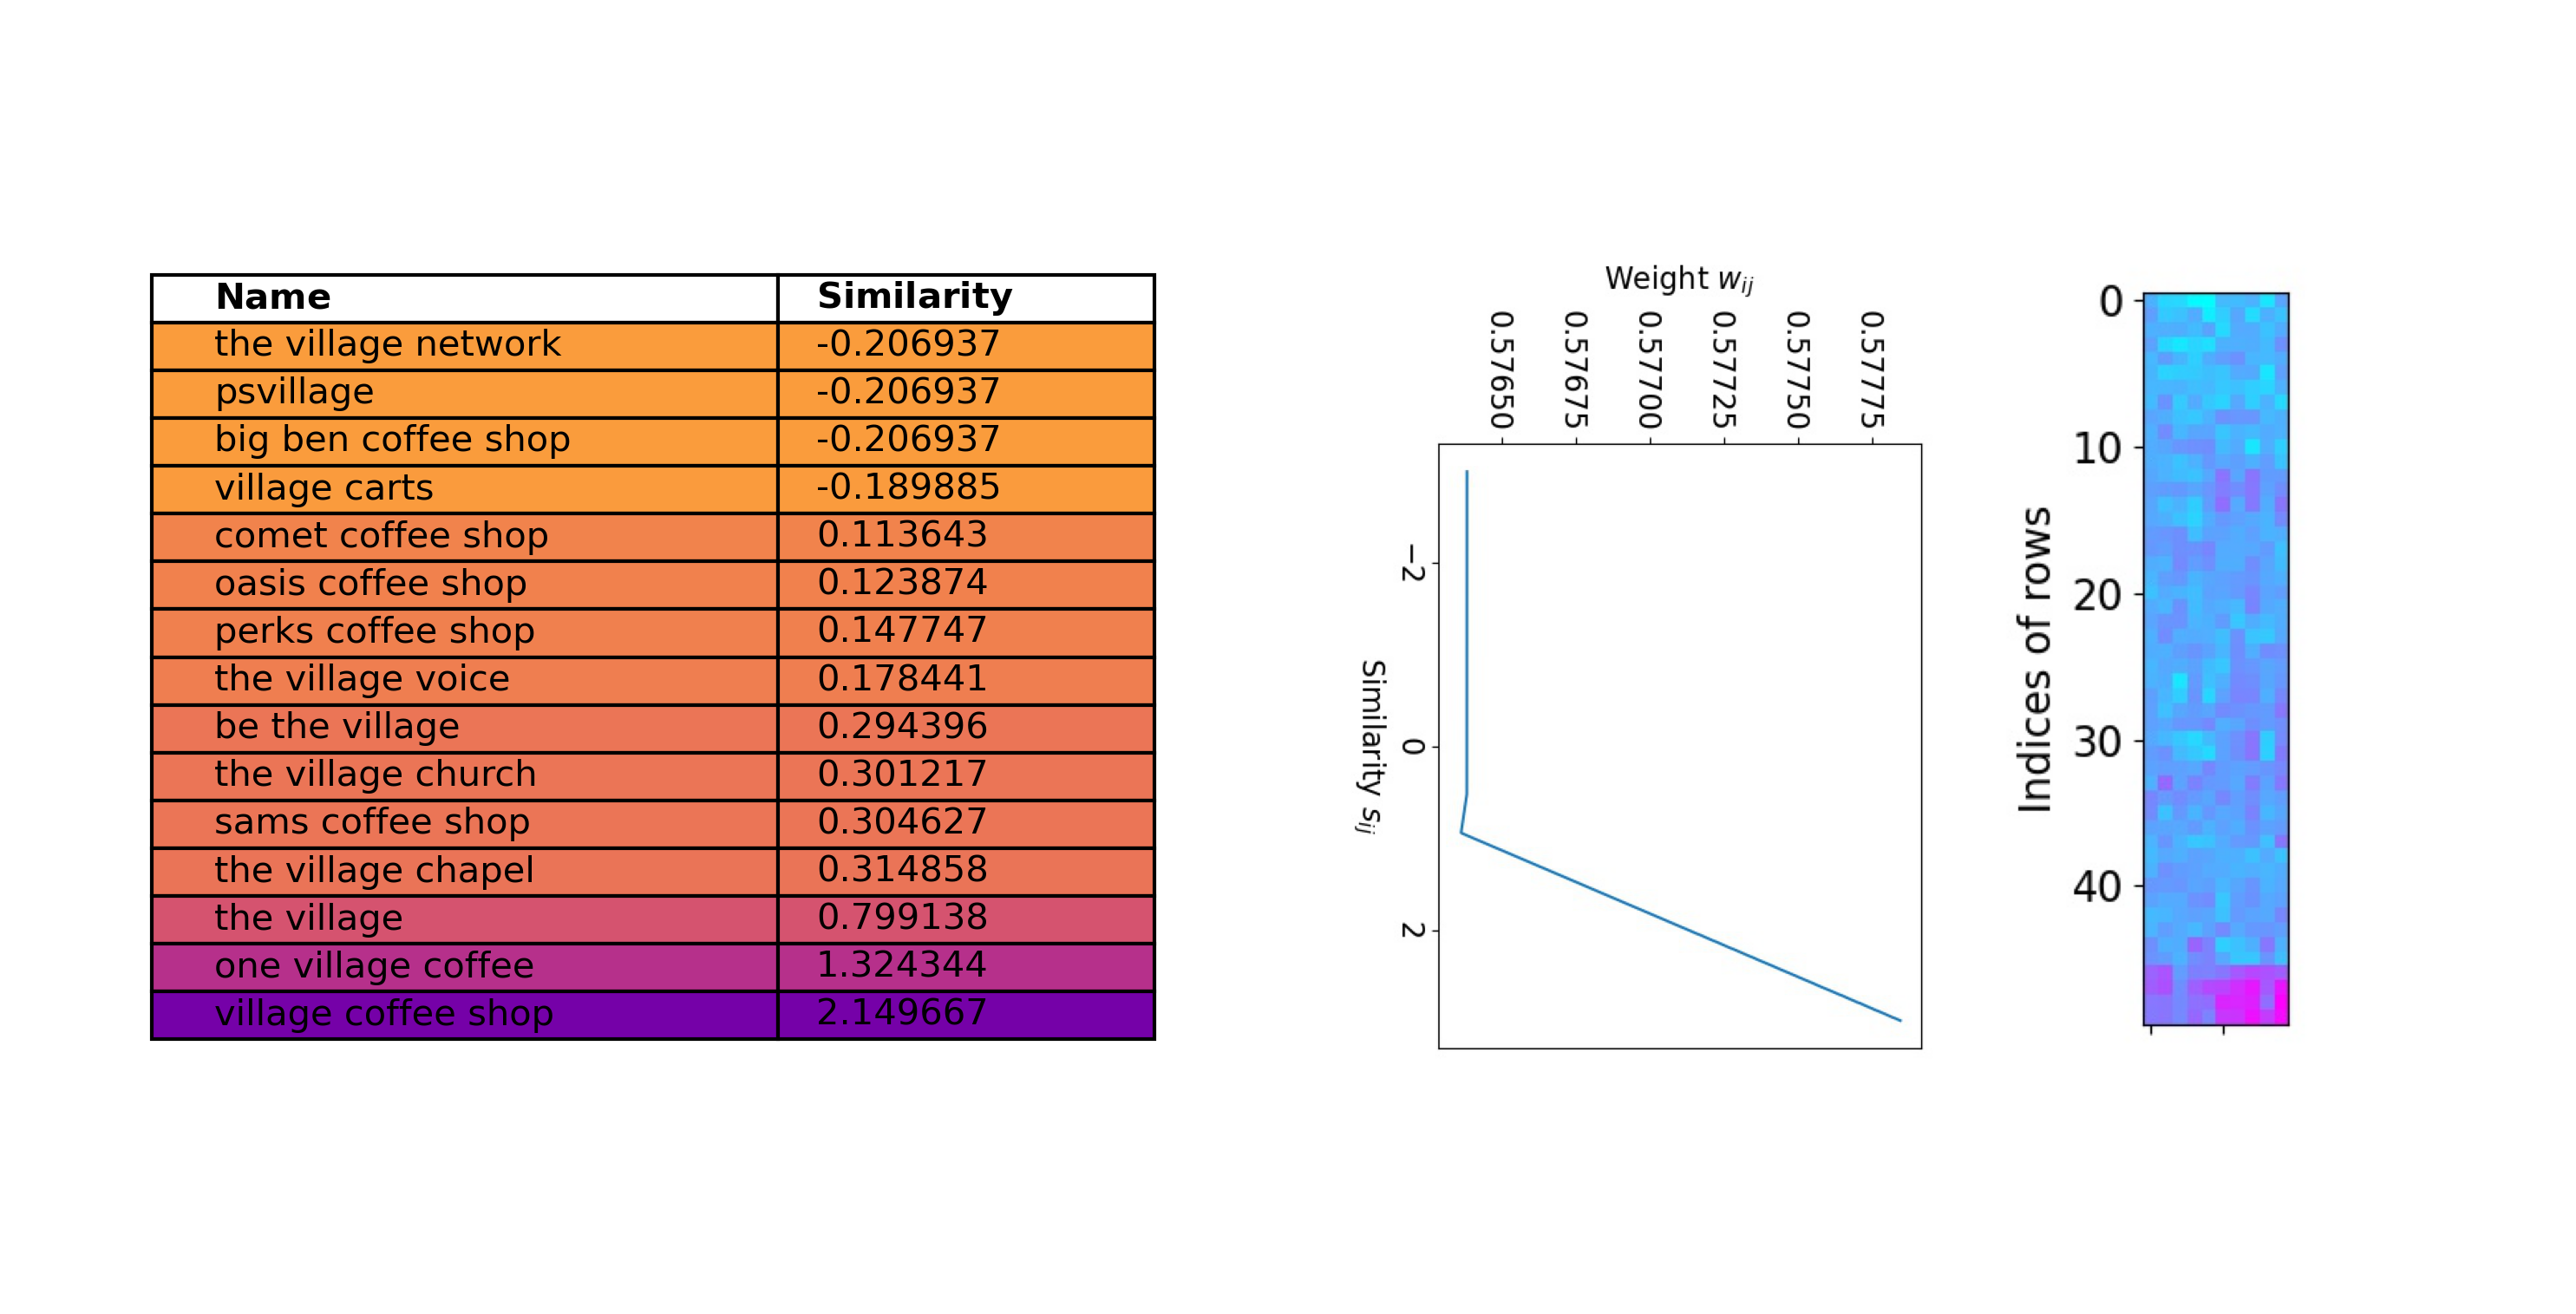

In [310]:
print(os.getcwd())
import cv2 as cv

matplotlib.rcParams['figure.dpi'] = 300
def plot_insight(merge_img_path, sim_img_path, batch_id):
    merge_img = cv.cvtColor(cv.imread(merge_img_path), cv.COLOR_BGR2RGB)
    merge_img = merge_img[:-30, 200:500, :]
    # merge_img = cv.resize(merge_img, None, fx=5, fy=5)
    sim_img = ndimage.rotate(mpimg.imread(sim_img_path), 270)
    name1, names2 = get_batch(batch_id)
    # create figure aligned in the bottom
    fig, ax = plt.subplots(1, 3, figsize=(10, 5), gridspec_kw={'width_ratios': [1.62, 0.82, 0.72], 'height_ratios': [1], 'bottom': 0})
    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')

    # plot a table of top 15 similar companies
    top_sims = names2[:15, 1][::-1].astype('float')
    top_names2 = np.array(['{:.6f}'.format(float(x)) for x in names2[:15, 1][::-1]])
    top_sim_names = np.stack([names2[:15, 0][::-1], top_names2]).T
    normal = matplotlib.colors.Normalize(top_sims.min()-1, top_sims.max()+1)
    mapper = matplotlib.cm.ScalarMappable(norm=normal, cmap='plasma_r')
    colors = mapper.to_rgba(top_sims)
    colors = np.repeat(colors[:, np.newaxis, :], 2, axis=1)
    print(colors)

    ax[0].table(cellText=top_sim_names, colLabels=['$\\bf{Name}$', '$\\bf{Similarity}$'], loc='center', colLoc='left', cellLoc='left', edges='closed', colWidths=[0.5, 0.3], cellColours=colors)
    #
    # # set background color of top 5 lines to purple
    # for i in range(5):
    #     table[(0, 0)].set_facecolor('#e6e6ff')
    #     table[(15-i, 1)].set_facecolor('#e6e6ff')

    ax[1].imshow(sim_img)
    ax[2].imshow(merge_img)

    fig.tight_layout()
    fig.savefig('../fig/insight.jpg', bbox_inches='tight', pad_inches=0)

plot_insight("../log/company_fedsim_2022-09-11-15-39-30/merge_epoch_28.jpg", "../log/company_fedsim_2022-09-11-15-39-30/sim_epoch_28.jpg", 10259)

'/mnt/n1p1/home/zhaomin/project/FedSim/src'